# Insights of Delhivery

Dataset from https://www.kaggle.com/datasets/devarajv88/delhivery-logistics-dataset

In [160]:
# Initial Package to load
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



## Lectura de datos


In [161]:
#Data read
data = pd.read_csv('/Users/luigi/Documents/Data_Analysis_Folio/Delhivery_Logistics_DataAnalysis/delhivery.csv')
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### Características de los datos

In [162]:
data.shape


(144867, 24)

In [163]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### Descriptiva estadística de mi dataset 

In [165]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [166]:
data.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

Suma de valores nulos en cada columna 

In [167]:
# Sum of Null values in each columns 
incomplete_values = data.isnull().sum()
incomplete_values

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

Eliminando columnas con valores faltantes para nuestro análisis

In [168]:
#Drop columns data
df = data
df.dropna(inplace=True)
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

Ordernando columas por tipo de dato

In [169]:
numeric_data = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_data = df.select_dtypes(include=['bool', 'object']).columns.tolist()

print("Numeric columns:", numeric_data)
print("\nCategorical columns:", categorical_data)

Numeric columns: ['start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']

Categorical columns: ['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 'destination_name', 'od_start_time', 'od_end_time', 'is_cutoff', 'cutoff_timestamp']


### Cantidad de tipos de ruta

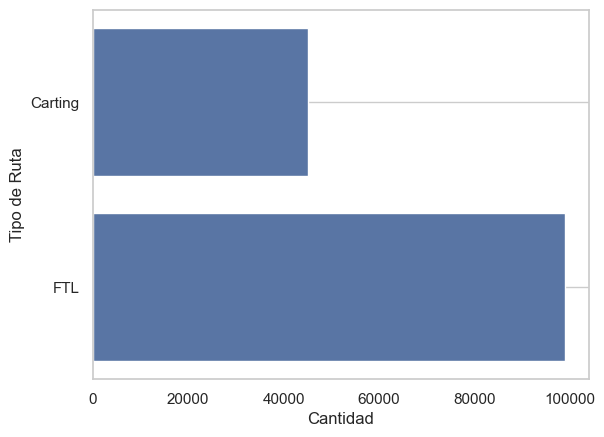

In [170]:
sns.countplot(y='route_type', data=df)
plt.ylabel('Tipo de Ruta')
plt.xlabel('Cantidad')
plt.grid()
plt.show()

## Distribución de los tipos de rutas

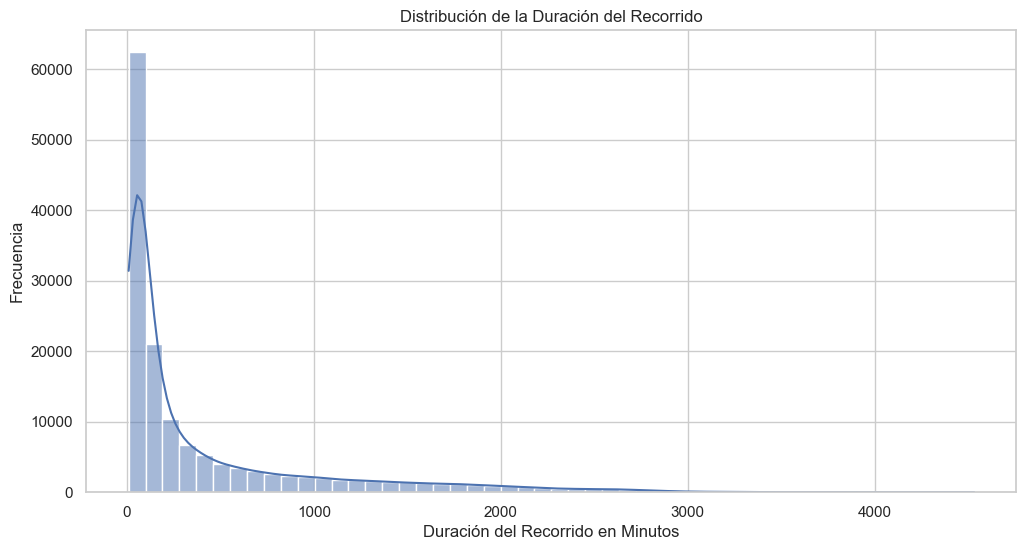

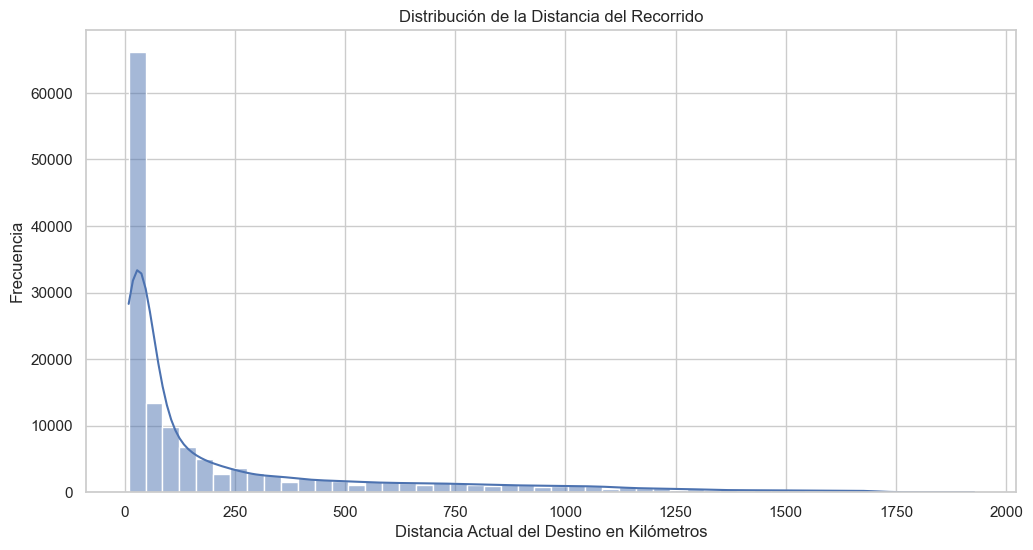

In [171]:
#set plot style
sns.set(style='whitegrid')

# Plot Distribution of trip duration
plt.figure(figsize=(12,6))
sns.histplot(df['actual_time'], bins=50, kde='true')
plt.title('Distribución de la Duración del Recorrido')
plt.xlabel('Duración del Recorrido en Minutos')
plt.ylabel('Frecuencia')
plt.show()

# Plot Distribution of trip distance
plt.figure(figsize=(12,6))
sns.histplot(df['actual_distance_to_destination'], bins=50, kde='true')
plt.title('Distribución de la Distancia del Recorrido')
plt.xlabel('Distancia Actual del Destino en Kilómetros')
plt.ylabel('Frecuencia')
plt.show()

## Relación entre la duración y la distancia del recorrido

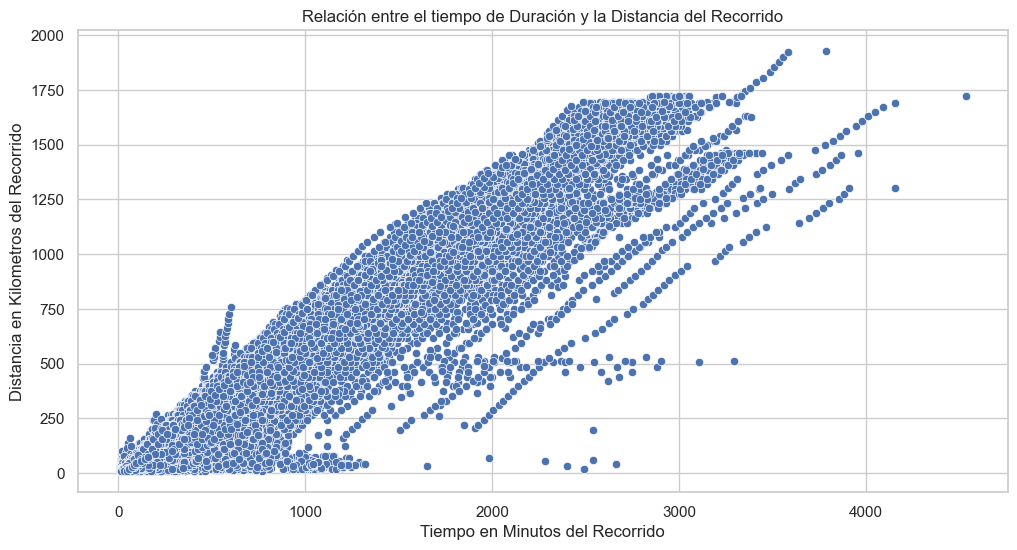

In [172]:
# Plot relationship duration and distance trip 
plt.figure(figsize=(12,6))
sns.scatterplot(x='actual_time', y='actual_distance_to_destination', data=df)
plt.title('Relación entre el tiempo de Duración y la Distancia del Recorrido')
plt.ylabel('Distancia en Kilometros del Recorrido')
plt.xlabel('Tiempo en Minutos del Recorrido')
plt.show()

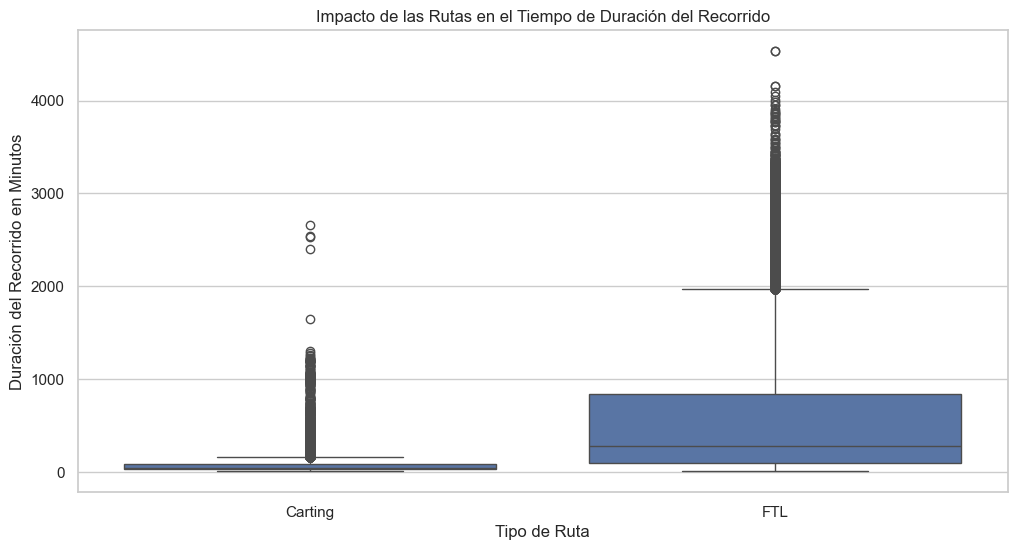

In [173]:
# Plot impact route type in trip duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='route_type', y='actual_time', data=df)
plt.title('Impacto de las Rutas en el Tiempo de Duración del Recorrido')
plt.ylabel('Duración del Recorrido en Minutos')
plt.xlabel('Tipo de Ruta')
plt.show()

## Análisis de Estados con el mayor número de recorridos FTL y Carting

In [174]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


Cantidad de valores únicos por ID de los recorrridos

In [175]:
df['trip_uuid'].nunique()

14787

Agrupando únicos valores por ID

In [176]:
# Grouped dataframe in function of column trip_uuid
df_groupedby_ID = df.groupby('trip_uuid')

Al organizar los valores en función de su ID único, se puede observar que existen viajes/recorridos que tienen el mismo identificador único pero se mueven por distintas rutas 

### Normalizando los datos

In [177]:
df_computed = df_groupedby_ID.agg ({
    'route_type': 'first', 
    'source_name': 'first', 
    'destination_name': 'first', 
}).reset_index()

df_computed

,trip_uuid,route_type,source_name,destination_name
0,trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh)
1,trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka)
2,trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana)
3,trip-153671046011330457,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra)
4,trip-153671052974046625,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka)
...,...,...,...,...
14782,trip-153861095625827784,Carting,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab)
14783,trip-153861104386292051,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana)
14784,trip-153861106442901555,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh)
14785,trip-153861115439069069,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu)


Extrayendo carácteres de tipo "string" de las columnas source_name y destination_name

In [178]:
df_computed['source_state'] = df_computed['source_name'].str.extract(r'\((.*?)\)')
df_computed['destination_state'] = df_computed['destination_name'].str.extract(r'\((.*?)\)')
df_computed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   trip_uuid          14787 non-null  object
 1   route_type         14787 non-null  object
 2   source_name        14787 non-null  object
 3   destination_name   14787 non-null  object
 4   source_state       14787 non-null  object
 5   destination_state  14787 non-null  object
dtypes: object(6)
memory usage: 693.3+ KB


Clasificando filas con route type igual a FTL

In [179]:
group_FTL = df_computed[df_computed['route_type'] == 'FTL']

groupby_FTL = group_FTL.groupby(['source_state', 'destination_state'])
datatype_data = type(groupby_FTL)
print(datatype_data)



<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


Cantidad de recorridos en los estados de origen y destino

In [180]:
df_number_trips = groupby_FTL.size().reset_index(name='number_trips')
df_number_trips

,source_state,destination_state,number_trips
0,Andhra Pradesh,Andhra Pradesh,265
1,Andhra Pradesh,Karnataka,14
2,Andhra Pradesh,Orissa,2
3,Andhra Pradesh,Telangana,16
4,Assam,Arunachal Pradesh,1
...,...,...,...
122,West Bengal,Bihar,1
123,West Bengal,Haryana,11
124,West Bengal,Jharkhand,20
125,West Bengal,Orissa,27
